# **Chapter 5: Numerical Integration**

## ***Learning Objectives:***



*   Calculate the numerical solutions to sets of ODEs using the Euler, midpoint, and Runge-Kutta methods
*   Approximate the error of these methods using a Taylor series expansion
*   Understand the sensitivity of each method to the time-step size, and how this sensitivity relates to the method order




We will conclude our exploration of methods for solving ODEs by discussing numerical  methods. Even a few years ago, I would have been tempted to cover this entire chapter  with two short sentences:

> Open `MATLAB` on your computer.
>
> Type `help ode45` at the command line.

In other words, the methods I’m about to describe have already been implemented in  MATLAB – so why do you need to learn them? The first reason is that you will be better  able to use the MATLAB functions if you really understand how they work and what  their limitations are. That is not the most important reason, however. I want you to learn  these methods so that you can roll your own versions of the methods, adapting them to  your own needs as necessary. In particular, your ability to alter and, when necessary,  subvert these numerical solving techniques will be critical to creating **hybrid models** that  combine ODEs with non-ODE-type methods. I’ll come back to this point in Chapter 10.

## **Section 5.1. The Euler method**

Numerical integration of ODEs depends on a fairly straightforward problem: given a  function $f(x) = dx/dt$, and values for $x$ and $t$ at a particular instant (I’ll call them $x_0$ and $t_0$,  respectively), determine the value of $x$ at a later timepoint ($x_1$ and $t_1$). If you recognize  that $dx/dt = f(x)$ is the form of an ODE, then you can probably also see that our protein  and mRNA equations from Chapters 3 and 4 can be solved using these same approaches.

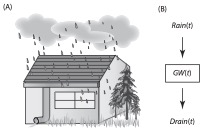

> **Figure 5.1 (see also Figure 3.2).**  **Conceptualizing ODEs with a rain gutter analogy.**  During a rainstorm, water enters the gutter at rate *Rain*, flows out of the drainpipe at rate *Drain*, or builds up in the gutter to an amount *GW*.  (B) The compartment diagram for the analogy indicates that water only enters the gutter from the rain and only exits the gutter from the drain; the diagram also captures the dependence on time of these processes.

Not to drag this book back into the gutter, but let’s revisit the analogy I developed in  Chapter 3 (Figure 5.1, a refresher, was originally Figure 3.2). Remember, I was  estimating the amount of water in my rain gutter over time by measuring the rates of  rainfall and drainage, with this mass balance equation:

> <h3> $GW(t + \Delta t)  = GW(t) + Rain(t) * \Delta ) - Drain(t) * \Delta t$

*(Equation 5.1)*

I then proceeded to derive an ODE from this equation:

> <h3> $\frac{dGW}{dt}  = Rain(t) - Drain(t)$

*(Equation 5.2)*

We can cast the central problem of this chapter in terms of this rain gutter equation by  recognizing that $GW$ is analogous to $x, Rain(t) - Drain(t)$ to $f(x)$, t in Equation 5.1 to $t_0$, and $(t + Δt)$ to $t_1$. In that context, let’s rearrange Equation 5.1:

> <h3> $GW(t + \Delta t) = GW(t) + (Rain(t) - Drain(t)) * \Delta t$

*(Equation 5.3)*

In other words, we can numerically predict the amount of water in the gutter at a future time if we know the present amount of water, the present rates of rainfall and drainage, and the interval between the present and future time.  Now let’s apply our analogy to approximate $x_1$ based on what we know about $x_0$:


> <h3> $x_1 = x_0 + \Delta t * f(x_0)$

*(Equation 5.4)*

To get a feeling for what Equation 5.4 really means, take a look at Figure 5.2.  When you make this approximation, you draw a line extending from, and tangent to, the point $(x_0, t_0)$.  You then approximate x1 as the value of x where the tangent line intersects with $t = t_1$.  In fact, Equation 5.4 is the equation of a line, and if t0 is set as the origin, $x_0$ is the intercept and $f(x_0)$ is the slope.


The method that I’ve outlined here is called the Euler method.  You should note two things about applying the Euler method.  First, you can see from Figure 5.2 that the accuracy of the approximation depends on the magnitude of $\Delta t$.  When $t_1$ is far enough from $t_0$ (in Figure 5.2, about half way between $t_0$ and $t_1$), the approximation starts to diverge significantly from the actual solution.  The second thing to notice is that our function $f$ is evaluated at x0 when we use the Euler method.  I’ll elaborate on how to choose a useful time step, as well as other places to evaluate $f$, in a little bit.


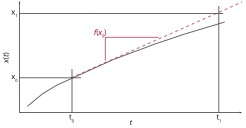

> **Figure 5.2.  The Euler method.** By drawing a line tangent to our curve (red dashed line) at point $(x_0, t_0)$, we can approximate the value of point $(x_1, t_1)$ from the slope of the tangent line.  This approximation becomes less valid as the curve diverges from the tangent, so we want to take the smallest step possible between $t_0$ and $t_1$ to generate the most accurate value for $x_1$.  Note that when $t_0 = 0$, Equation 5.4 is the equation of a line with intercept $x_0$ and slope $f(x_0)$.


Now that we’ve established how to implement the Euler method for a single time step, it won’t be too difficult to describe the numerical solution for a large number of time steps.  I’ll use a Python-esque pseudocode here:



```
(1) Define simulation timespan, starting at (t0, x0), and divide the timespan into N steps such that deltaT = timespan/N is sufficiently small.
(2) Define two arrays to hold the time and concentration data: tarr = [t0]; xarr = [x0];
(3) for i = 1:N
            tnew = tarr(i) + deltaT;
            xnew = xarr(i) + f(xarr(i))* deltaT;
            tarr = [tarr tnew];
            xarr = [xarr xnew];
    end
(4) plot(tarr, xarr)
```



I’ll address what it means to be “sufficiently small” in a minute.

## **Section 5.2: Accuracy and Error**

Let’s apply the Euler method to a familiar example to explore how it works.

Revisit the equation that you’ve most recently seen as Equation 4.1 (and previously in Equations 3.17 and 3.18): the simple expression of protein without feedback.  The two kinetics constants in this equation govern the rate of transcription and the rate of decay.  To make the analysis relatively straightforward, let’s set both of these rates equal to one, obtaining the following equation:


> <h3> $\frac{d[Protein]}{dt} = 1 - [Protein]$

*(Equation 5.5)*

We determined the general solution to this equation analytically in Equation 3.25; with the constants equal to 1 and initial conditions of (0,0), this solution simplifies to:


> <h3> $[Protein](t) = 1 - e^{-t}$

*(Equation 5.6)*

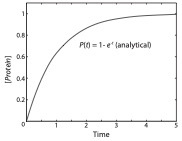

> **Figure 5.3.  The analytical solution for our simple protein system.**  The ODE (Equation 5.6) describing simple protein expression and decay, the rate constants for both of which are set to 1, without feedback.


The analytical solution to Equation 5.6 is plotted in Figure 5.3.  Now let’s try using the Euler approximation.  We start with the same initial conditions.  Our function $f(Protein)$ is determined from Equation 5.5: $f(Protein) = 1-Protein$.  If we try a time step of 0.01, we can calculate the value of Protein at time = 0.01 as:


> <h3> $[Protein]_{(t=0.1)} = [Protein]_0 + 0.01*(1-[Protein]_0) $

*(Equation 5.7)*

which evaluates to $0 + 0.01*1 = 0.01$. Interestingly, if we substitute $t = 0.01$ into Equation 5.6, we also obtain $0.01$. So for the first time step at least, the Euler method provides a good approximation. We follow the same procedure to determine the rest of the solution, and it turns out that the line from the Euler method completely overlaps the line from the analytical solution (Figure 5.4).

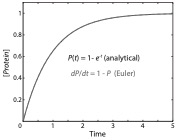

> **Figure 5.4.  The Euler method for $t = 0.01$ provides a very accurate approximation for Equation 5.6.** Here, the line we generated using the Euler method (dashed grey) completely overlaps the line from the analytical solution (Figure 5.3; black line).  A time step of $\Delta t = 0.01$ is therefore sufficiently small to return a reasonable approximation via the Euler method.


So far, so good: apparently a time step of $0.01$ is “sufficiently small” to give us a good approximation in this case.  How did I know to choose $0.01$ as the time step?  I just tried a few possibilities, and the fit that I saw in Figure 5.4 looked good to me!  I can also show you what some of my other tries looked like.  For example, what happens when we move to a bigger time step?  The answer appears in Figure 5.5, where I’ve plotted the Euler approximation of Equation 5.5 for increasingly large time steps.  Notice that the approximation quickly becomes inaccurate as the time step is increased.

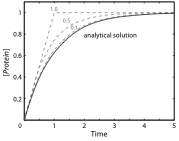

> **Figure 5.5.  Increasing the size of the time step generates less accurate approximations via the Euler method.**  Time steps of $\Delta t$ = 0.1, 0.5, and 1.0 (dashed grey lines) lead to larger and larger deviations from the curve of the analytical solution to Equation 5.6 (black line).  Recall that a time step of $\Delta t = 0.01$ did not deviate from the analytical solution in Figure 5.4.


It would be nice to dig a little deeper with this observation, especially to examine ways to describe the accuracy of a given method and time step.  We will discuss two ways to look at the error: the first is very specific to our example, and the second is more generalizable.

First, let’s look specifically at our example.  For this case, we can define an error by determining the Euclidean distance between the analytical solution and the Euler approximation at time = 1, 2, 3, 4, and 5 as follows:

> ::$error = \sum_{1=1}^{5}([Protein]_{analytical, t = i} - [Protein]_{Euler, t = i})^2$

*(Equation 5.8)*

Table 5.1 shows the error (Equation 5.8) for four time step lengths.  As you saw in Figure 5.5, the error increases substantially with time step length, and the increase is non-linear: as the time step increases from 0.01 to 0.1, the error increases by about ten-fold, but with the increase from 0.1 to 1.0, the error increases by approximately 15-fold.

|<h3> **Time Step**| <h3>**Error**       |
| ------------     | ---------------     |
| <h3>0.01         | <h3>0.0045          |
| <h3>0.1          | <h3>0.0455          |
| <h3>0.5          | <h3>0.2450          |
| <h3>1            | <h3>0.5781          |


> **Table 5.1. Error introduced by the Euler approximation at various time steps, calculated using Equation 5.8.**

Equation 5.8 is admittedly a bit artificial (we can’t apply it to compare numerical techniques for every equation we want to solve) and so we will also use a more general approach for determining error.  One way involves the use of a Taylor series approximation.  We won’t discuss the details of the approach here, but briefly, if you have a defined function $S$ of some variable $y$, and want to approximate the value of that function when $y$ is near a value a for which $S(a)$ is known, the Taylor series  approximation can be made to determine $S(y)$:

> <h3> $S(y) \approx S(a) + \frac{S'(a)}{1!}(y-a) + \frac{S''(a)}{2!}(y-a)^2 + \frac{S'''(a)}{3!}(y-a)^3 + ... + \frac{S^n(a)}{n!}(y-a)^n$

*(Equation 5.9)*

where $S’(a) = dS/dy$, evaluated at $a$.  For this approximation to work, $S$ must be “infinitely differentiable” $(S’, S’’$, and so on), even though in practice we only use the first handful of terms in the approximation to simplify the calculation.


The Taylor series approximation gives us a second, independent numerical method (the first method in this case is the Euler method itself) to predict future values of a function.  Another way to calculate error, particularly when the analytical solution is not known, would therefore be to compare approximations from a variety of methods.  For example, we could approximate the “error” of the Euler method as the difference between values calculated using it and the Taylor series approximation.


Referring back to Equation 5.4, you’ll recall that we determined a new value of $x (x_1)$ in terms of an earlier value $x_0$, a function that described the time dynamics $f(x)$ and the time step $\Delta t$.  If we substitute $x(t)$ for $S(y)$, let $t_1 = t_0 + \Delta t$, and set $a = t_0$, Equation 5.9 becomes:


> <h3> $x(t_1)_{Taylor} \approx x(t_0) + \frac{1}{1!} \frac{dx}{dt} \Big\rvert _{x(t_0)}(t_0 + \Delta t - t_0) + \frac{1}{2!} \frac{d^2x}{dt^2} \Big\rvert _{x(t_0)}(t_0 + \Delta t - t_0)^2 + ...$

*(Equation 5.10)*

Simiplification leads to:

> <h3> $x(t)_{Taylor} \approx x_0 + \Delta t * f(x_0) + \frac{1}{2}\Delta t^2 * f'(x_0) + ...$

*(Equation 5.11)*


Now let’s define the error of the Euler method simply as the absolute difference between the values of x1 determined using the Euler method and using the Taylor series approximation:

> <h3>$error_{Euler} = \Big\rvert x_{1,Taylor} - x_{1,Euler} \Big\rvert$

*(Equation 5.12)*


Substituting Equations 5.4 and 5.11, and ignoring terms past the second derivative in Equation 5.11 (multiplying these terms by higher powers of Δt makes these terms relatively small), we obtain:

> <h3> $error_{Euler} = \frac{1}{2}f'(x_0)\Delta t^2$

*(Equation 5.13)*

Note that the $f’(x_0)$ term is a constant because it is evaluated at a specific value of $x$ $(x_0)$.  Equation 5.13 therefore reduces to:

> <h3> $error_{Euler} \propto \Delta t^2$

*(Equation 5.14)*

In plain English, the error depends on the square of the time step length, as we noticed in Figure 5.5 and Table 5.1.  The Euler method is called “first order” (the order of the method is the power of $\Delta t$ in Equation 5.14, minus one) because of this dependence.


## **Section 5.3: The Midpoint Method**

The Euler method is useful for teaching the concepts of numerical integration, but for real-world problems like ours where error is a concern, we’ll need higher-order methods.  “Higher order” means that the error depends on a higher power of $\Delta t$, and so higher-order methods are generally more accurate at a given $\Delta t$.  Let’s consider a second-order approach called the midpoint method (Figure 5.6).

The left panel of Figure 5.6 is an illustration of the Euler method that is similar to Figure 5.2, except that I’ve made the curve a little more dramatic so that you can see the error more clearly.  As you can see, what’s causing the error in the Euler method is that big slope, which in the example is larger at $x_0$ than at any later time point.  If we approximated $x_1$ using a smaller slope determined from elsewhere in the curve, it could yield a more accurate calculation.

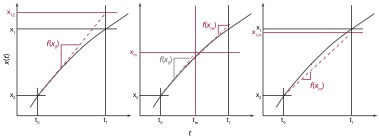

> **Figure 5.6.  Illustration of the midpoint method to approximate the value of $x_1$.**  Left, application of the Euler method leads to an assignment of x1,E based on the slope of the tangent to $f(x)$ at $x_0$, denoted as $f(x_0)$.  The error of the Euler method versus the analytical solution is $x_1 – x_{1,E}$, which is large here.  Middle, using the Euler method to approximate $x_m$ (Equation 5.16).  Right, solving Equation 5.15 with $x_m$ and $f(x_m)$ yields a value of $x_1$ that is too small, but with smaller error than that obtained by Euler’s method alone.


The midpoint method is simple in principle: determine the slope at the midpoint, and use that slope to calculate $x_1$.  First, we modify Equation 5.4 to include the midpoint:


> <h3> $x_{1,m} = x_0 + f(x_m) * \Delta t$

*(Equation 5.15)*

where $x_{1,m}$ is the approximation of $x_1$ calculated using the midpoint method, and $x_m$ is the value of $x$ half-way across the time interval (at time $t_m$, equal to $(t_0 + t_1)/2)$.


Wait a minute, you’re thinking (I hope) – if we don’t know $x_1$, how do we know xm?  Well, we don’t know $x_m$!  We can only approximate it, and the tool that we have is … the Euler method.  $x_m$ is therefore calculated as:


> <h3> $x_m = x_0 + f(x_0) * \frac{\Delta t}{2}$

*(Equation 5.16)*

The calculation of $x_m$ is also shown in the middle panel of Figure 5.6.  Notice that the Euler method predicts a value for $x_m$ that is also too large.  As a result, $f(x_m)$ will not actually be the slope of the curve at $t_m$, but at a higher value of $t$, which in this case has a smaller slope.  Once $x_m$ and $f(x_m)$ are determined, they can be used to solve Equation 5.15 to yield $x_{1,m}$ (Figure 5.6, right).  Alternatively, Equations 5.15 and 5.16 can be combined into a single equation:


> <h3> $x_{1,m} = x_0 + f(x_0 + \frac{1}{2}f(x_0)\Delta t) * \Delta t$

*(Equation 5.17)*

Figure 5.7 illustrates how the midpoint and Euler methods compare over a larger span of the curve from the analytical solution.  Note that in our case, the Euler method overpredicts x1, while the midpoint method always underpredicts it.  This effect is due to the difference in slope discussed above.  Using the Taylor series approximation, we can estimate the error of the midpoint method as before.  The error turns out to be proportional to $\Delta t^3$, so the midpoint method is second order.  For Figure 5.7, the error (Equation 5.8) is 0.3907 for the midpoint method, which is 60% of the Euler method error at $\Delta t$ = 1.


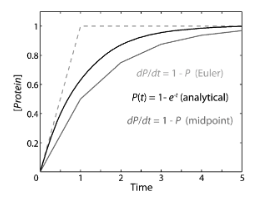

> **Figure 5.7.  The midpoint method (dark grey) versus the Euler method (light grey dashed) and the analytical solution (black) for $\Delta t$ = 1.**


## <u> **Practice Problem 5.1:** </u>

*Given the equation:
$\frac{dp}{dt} = \frac{p^3+2p}{3}$ and that p(0) = 2, t(0) = 0 and $\Delta$t = 0.5, use the midpoint method to find p(t=0.5). Show your work.*

**Solution to Practice Problem 5.1:**

First we find $p_m$ using the Euler method and Equation 5.16:

$p_m = p_0 + f(p_0)*\frac{\Delta t}{2}$

$p_m = 2 + \frac{2^3+2*2}{3}*\frac{0.5}{2} = 3$

Next, we substitute the value for $p_m$ into Equation 5.15:

$p_{1,m} = p_0 + f(p_m)*\Delta t$

$p_{1,m} = 2 + \frac{3^3+2*3}{3}*0.5 = 7.5$


## <u> **Practice Problem 5.2:** </u>

*The transition from one to two equations can be particularly difficult for those who are new to numerical integration. Using the midpoint method numerically integrate the following two equations:*

$\frac{dm}{dt} = p$ *and* $\frac{dp}{dt} = 2m$

*given that* $m(0) = 4$, $p(0) = 2$, $(0) = 0$, *and* $\Delta t = 1$.

Solution to Practice Problem 5.1

First, find $m_m$ and $p_m$. The equations are:

$m_m = m_0 + f_m(m_0,p_0)*\frac{\Delta t}{2}$

$p_m = p_0 + f_m(m_0,p_0)*\frac{\Delta t}{2}$

where $f_m = p$ and $f_p = 2m$.

Substitution yields:

$m_m = m_0 + p_0*\frac{\Delta t}{2}$

$m_m = 4 + 2*\frac{\Delta t}{2} = 5$

$p_m = p_0 + 2m_0*\frac{\Delta t}{2}$

$p_m = 2 + 2*4*\frac{\Delta t}{2} = 6$

Next, use $m_m$ and $p_m$ to find $m_l$ and $p_l$:

$m_{1,m} = m_0 + f_m(m_m, p_m)*\Delta t$

$m_{1,m} = 4 + 6 = 10$

$p_{1,m} = m_0 + f_p(m_m, p_m)*\Delta t$

$p_{1,m} = 2 + (2*5) = 12$

## **Section 5.4: The Runge-Kutta Method**

We can carry the principles of the midpoint and Euler methods still further using a higher-order approximation.  Carl Runge and Martin Kutta, of the Technische Hochschule Hannover and the Rheinisch-Westfälische Technische Hochschule Aachen, respectively, developed a robust implementation of this approach, which is named for them.  As we have seen, the error in both the Euler and midpoint methods essentially depends on an imperfect approximation of the slope (Figure 5.6).  The Runge-Kutta method addresses this problem by using a weighted average of slopes.


The first slope, which we will call $f_1$, is the slope calculated using the Euler method:


$f_1 = f(x_0)$ (Equation 18)

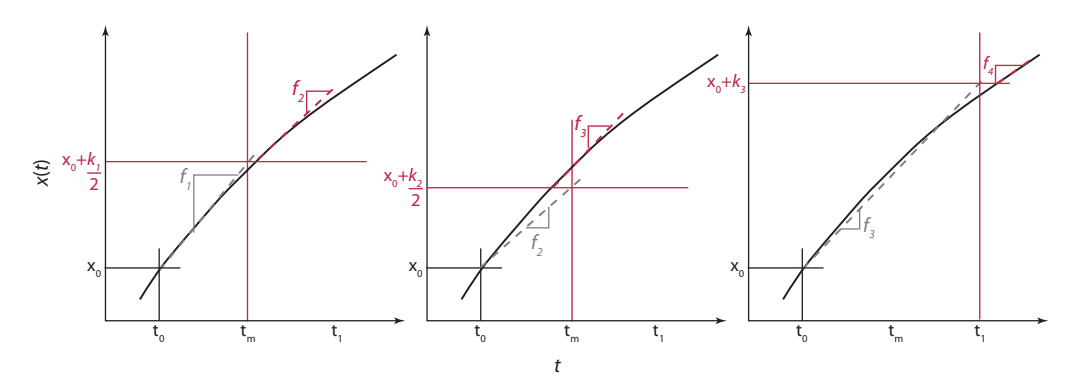

> **Figure 5.8.  Calculation of the four slopes for implementation of the Runge-Kutta method.**  Left, $f_1$ is the slope of the curve at x0, while $f_2$ is the slope that would have been calculated using the midpoint method in Figure 5.6.  Middle, $f_3$ is also calculated via the midpoint method, but with $f_2$ in place of $f_1$.  Right, $f_4$ is based on the estimated endpoint.  These four calculated slopes are weighted and averaged to estimate x1.


In other words, f1 is simply the slope of the curve at $x_0$ (Figure 5.8, left).  To simplify the equations, let’s define a set of variables $k$ as $k_i = \Delta t*f_i$.  The second slope is then calculated using the following equation:


$f_2 = f(x_0 + \frac{1}{2}k_1)$ (Equation 5.19)

If you compare Equation 5.19 with Equation 5.17, you will see that the second slope is the slope that would be calculated using the midpoint method (Figure 5.8, left).  The third slope is also calculated via the midpoint method (Figure 5.8, middle), with the exception that the second slope is used in the calculation in place of the first:


$f_3 = f(x_0 + \frac{1}{2}k_2)$ (Equation 5.20)

Finally, the fourth slope is not determined at the beginning of the time interval, or at estimated midpoints, but at an estimated endpoint (Figure 5.8, right):

$f_4 = f(x_0 + k_3)$

The four slopes are weighted and averaged to calculate the new value of $x_1$:

$x_{1,RK} = x_0 + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

Figure 5.9 depicts the analytical solution for Equation 5.5, together with the three numerical methods that we have discussed in this chapter.  In this figure, the time step was equal to one, and so only six points were calculated for each numerical method (your comparison of the methods in Figure 5.9 should focus on the points, not the lines between the points).  You should see that for these six points, the Runge-Kutta solution is nearly indistinguishable from the analytical solution, while the other numerical methods are clearly different.

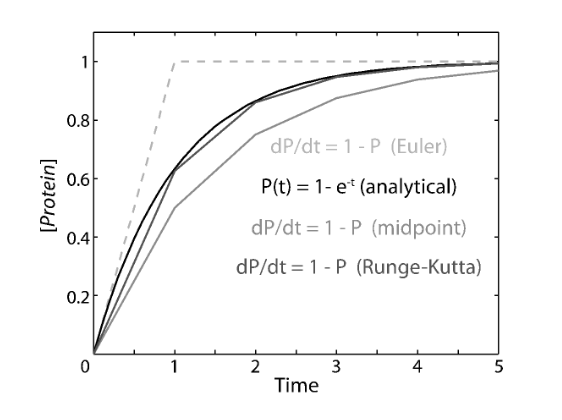

> **Figure 5.9.  Comparison of the analytical solution (black) with the Euler (dashed light grey), midpoint (grey), and Runge-Kutta methods (dark grey)** for $\Delta t = 1$.  The Runge-Kutta method generates a curve that is extremely similar to the analytical solution.


To help illustrate the Runge-Kutta method more clearly, let’s calculate the value of $[Protein]$ at $t = 1$,  $[Protein]_0 = 0$, and $f([Protein]) = 1 - [Protein]$, as given in Equation 5.5.  With $\Delta t = 1$, we can simply consider the four slopes in Table 5.2 using Equations 5.18-21.

**Table 5.2.  Values of k calculated using the Runge-Kutta method.**

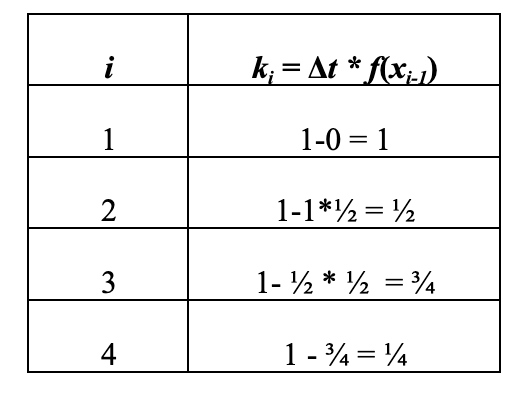

With these values, x1 is determined using Equation 5.22 as $0 + 1/6 * (1+1+6/4+1/4) = 5/8$ or $0.625$.  For comparison, the value of $x_{t=1}$ determined analytically is approximately $0.632$.  Using Equation 5.8 to estimate the error of the Runge-Kutta method for this particular case yields a value of $0.0175$, which is 33-fold more accurate than the Euler method and over 20-fold more accurate than the midpoint method.  Furthermore, the Taylor series approximation approach to determining error reveals that the Runge-Kutta method error is proportional to $\Delta t ^5$.

The Runge-Kutta method is therefore fourth order and in fact, is the ‘4’ in Python’s `odeint` function.  The ‘5’ comes from adaptively controlling the step size, which is a nice addition but often unnecessary.  For most uses, the Runge-Kutta method has stood the test of time.  

You now have all three major tools for modeling and understanding ODEs in your toolbelt – congratulations!  These numerical approaches are particularly important because the size of the system you can study increases dramatically.  But why did I force you to learn something that Python can easily do for you?  The answer is that knowing how the algorithm works will give you the power to change it when necessary.  Without this ability, my lab would never have been able to create a model of a whole cell, for example, because we wanted to integrate ODE-based approaches with other approaches as far-flung as Boolean logic, linear optimization, and stochastic methods (Chapters 9 and 10).  We’ll discuss this kind of integration later, and you’ll see that your familiarity with these numerical methods will be critical.

## **Chapter Summary**

Numerical integration is the most common way to solve sets of ODEs, in particular when more than a few ODEs need to be solved simultaneously.  We first considered the Euler method; we began with a set of initial conditions, and then used the instantaneous rate of change at those conditions to estimate the new conditions.  For a one-dimensional ODE, we showed how the instantaneous rate of change gives us the slope of a line, which we multiplied by the timestep length and added to the initial value (at $t_0$) to obtain the next value (at $t_1$).  The Euler method is highly sensitive to the step size (the error is supposed to be proportional to the square of the time step, as we determined by comparison to a Taylor series expansion) and so other methods have been devised that are associated with a smaller error.  The Euler method is called a first-order method because the error is proportional to the square of the time step.

The midpoint method uses the Euler method to estimate the variable value at $t_{1/2}$ (half-way between $t_0$ and $t_1$) and to determine the instantaneous rate of change at that value to generate a slope.  The midpoint method is called second-order, because its error is estimated to be proportional to the cube of the time step.

The Runge-Kutta method builds on the Euler and midpoint methods by calculating a weighted average of four slopes (the Euler and midpoint slopes, together with a second estimate of the instantaneous rate of change at $t_{1/2}$ based on the midpoint, and an estimate of the instantaneous rate of change at $t_1$ based on the third slope).  The error associated with the Runge-Kutta method is proportional to the fifth power of the time step, and so this method is called fourth-order.  This method is the most commonly used numerical integrator, and has been implemented in MATLAB (with a variable step size) as ode45.  Even though this function is simple to implement, it’s important for us to learn how numerical integration works so that we can adapt the methods to our own purposes as necessary.


**Recommended Reading**

* Ellner, S. and Guckenheimer, J.  *Dynamic Models in Biology*.  Princeton University Press, 2006.

* Moore, H.  *MATLAB for Engineers (3rd Edition)*.  Prentice Hall, 2011.

* Press, W. H., Teukolsky, S. A., Vetterling, W. T., Flannery, B. P.  *Numerical Recipes 3rd Edition: The Art of Scientific Computing.*  Cambridge University Press, 2007.

## **Problems**

### **Problem 5.1.  A simple ODE**

This problem is more illustrative than biological, in order to build your skills.  Consider the differential equation:

$\frac{dp}{dt} = p^3$

with the initial condition $p_0$ = 0.5 at t = 0.

a) Calculate the value of $p(t = 1 s)$ by hand, using the Euler, midpoint, and Runge-Kutta methods.

b) Now solve the equation analytically. How does the analytical solution compare with your answers from (a)?

c) Write MATLAB code to simulate the dynamics of p over time using the Runge‐Kutta method.  Simulate 1 second with Δt = 0.01 s, beginning with p0 = 0.5.  Plot your result.  Did the smaller time step make the Runge-Kutta calculation more accurate?


### **Problem 5.2.  Two simple ODEs**

Using the Runge-Kutta method, numerically integrate the following two equations:

$\frac{dm}{dt} = p$

$\frac{dp}{dt} = 2m$

given that $m(0) = 4, p(0) = 2, t(0) = 0$, and $\Delta t$ = 1.

a) Calculate by hand the values of m(t = 1) and p(t = 1). Show your work.

b) Write MATLAB code to simulate the dynamics of m and p over time for 100 timesteps with ∆t = 0.1.  Don’t use ode45, of course!  Plot your result.

c) At a party, a crowd of people watches from behind as you code your own numerical integrator.  Under that pressure, you forget how to code a Runge-Kutta integrator and are forced to use the Euler method.  What parameter would you change to make your integrator more accurate?  What negative consequences would that have compared to higher-order methods?

### **Problem 5.3.  Our favorite autoregulatory, negative feedback system**

Recall that the system we’ve been studying throughout these chapters is governed by two ODEs (Equations 4.7 and 4.8):

$\frac{d[Protein]}{dt} = k_{trl}[mRNA] - k_{ploss}[Protein]$

$\frac{d[mRNA]}{dt} = k_{trs}(\frac{1}{1+[Protein]/K}) - k_{mloss}[mRNA]$

Let $K = k_{ploss}/k_{trl} = k_{trs}/k_{mloss} = 1$ and start with $[Protein]_0 = [mRNA]_0 = 0$.

a) Write three numerical integrators to solve this pair of ODEs using the Euler, midpoint, and Runge-Kutta methods.  Use $\Delta t$ = 0.01, and integrate from t = 0 to t = 10.  Plot $[mRNA]$ and $[Protein]$ on the same plot for each integrator.

b) Now run the same simulations at larger time steps $\Delta t$ = 0.1, 0.5, 1.0, and 5.0.  How do your integrations compare with one another at these different time steps?


### **Problem 5.4. A single feedback loop system with enzymatic degradation**

Problem 4.3 introduced you to the use of dynamic protein degradation to create a bistable switch, using the Lon protease found in Mesoplasma florum (mf-Lon).

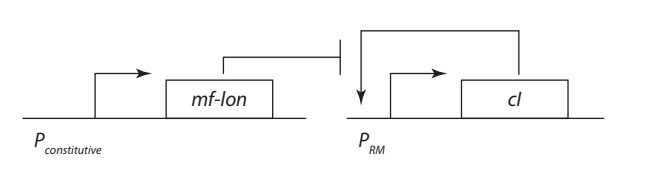

As mentioned in the previous chapter, the positive autoregulatory loop is identical to the one found in lambda phage, where promoter PRM expresses the lambda repressor cI, which is also a transcriptional activator of PRM.

The equations that govern the system depicted above are:

$\frac{d[m_{cI}]}{dt} = k_{trs,max}(\frac{1}{1 + (\frac{K_{Diss}}{[p_{cI}]})^H} + l_{P_{RM}}) - k_{mloss}[m_{cI}]$

$\frac{d[mRNA]}{dt} = k_{trs}(\frac{1}{1+[Protein]/K}) - k_{mloss}[mRNA]$

where H equals the Hill coefficient of the system, $K_{Diss}$ is the dissociation constant of cI from $P_{RM}$, $l_{PRM}$ is the fraction of mRNA transcription from the $P_{RM}$ promoter that is due to leakage (basal expression), $k_{cat}$ is the catalytic rate of mf-Lon, $p_L$ is the protein concentration of mf-Lon, and $K_M$ is the Michaelis constant for mf-Lon (we’ll discuss Michaelis constants in more detail in Chapter 9).  As described in Problem 3.4, when multiple repressor binding sites occur in front of a gene, the Hill coefficient describes the cooperative binding properties of that system (for two binding sites, H = 2, etc.).

As before, let’s set:

$k_{trs,max} = 1.35 * 10^{-9} M^2 s^{-1}$

$K_{diss} = 2.5 * 10^{-8} M$

$l_{PRM} = 0.1$

$k_{mloss} = 2.38 * 10^{-3} s^{-1}$

$k_{trl} = 5 * 10^{-5} s^{-1}$

$k_{ploss} = 2 * 10^{-4} s^{-1}$

$k_{cat} = 0.071 s^{-1}$

$p_{L} = 1 * 10^{-10} M$

$K_{M} = 3.7 * 10^{-9} M$

$H = 2$

Let the initial amounts of cI mRNA = 200 nM and cI protein = 50 nM.

a) Calculate the steady-state quantities of cI mRNA and protein analytically.

b) Using the midpoint method, find the concentrations of mRNA and protein at $t = 0.1$, using $\Delta t$ = 0.1.  Show your work.

c)Now build a Runge-Kutta numerical integrator in MATLAB to solve the ODEs.  Generate plots of mRNA and protein concentrations over time.  How do your results compare to your answer for (a)?

d)Plot the nullclines for the two ODEs (hint: you may have already done this as part of Problem 4.3).  Now, on the same nullcline graph, plot the paths taken by mcI and $p_{cI}$.  Make sure you run enough time steps to visualize the behavior you expect!  You’ll find the hold command to be useful here.

e) Now change the initial conditions as follows, plotting the concentrations of cI mRNA and protein over time and also on the nullcline plot.  Try $[mcI] = 70$ nM and $[pcI] = 10$ nM, and then $[mcI] = 151.53875097$ nM and $pcI] = 11.2000778972$ nM (yes, I chose these specific numbers on purpose!).  Are the results what you expect?  Again, you’ll find the subplot command useful here.
